In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import geopandas
import folium

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
wells = pd.read_csv('GOM_wells_db_Final1.csv')
offshore = pd.read_csv('CM_GOM_Offshore_sources1.csv')
#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
#wellsmap = geopandas.GeoDataFrame(wells, geometry=geopandas.points_from_xy(wells.Longitude, wells.Latitude))
#offsmap = geopandas.GeoDataFrame(offshore, geometry=geopandas.points_from_xy(offshore.Longitude, offshore.Latitude))

In [3]:
offshore = offshore.round({'f': 2, 'fmean': 3, "unc":3})
colors = sns.color_palette('bright')[0:5]

In [4]:
#offsmap = offsmap.astype({'geometry':'string'})
#offsmap.dtypes
#display(offsmap.head())
#print(offsmap.head())

#offsmap_pt = offsmap["geometry"].str.replace("POINT","")
##offsmap = offsmap.replace(" ", ",", regex=True)
#display(offsmap_pt.head())

#world_gdf = world.to_crs("+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs")
#world_gdf.crs
#display(world_gdf[world_gdf.continent == "Seven seas (open ocean)"])

In [5]:
#ax = world.plot(color='white', edgecolor='black')
#ax = cities.plot(color='white', edgecolor='black')

# works: world[world.continent == 'North America']
#full: ax = world[world.continent == "Seven seas (open ocean)"].plot(color='white', edgecolor='black')
#world.loc[world['name'] == 'Singapore']

# We can now plot our ``GeoDataFrame``.
#gdf.plot(ax=ax, color='red')

#wellsmap.plot(ax=ax, color='red')
#offsmap.plot(ax=ax, color='blue')
#plt.show()

In [6]:
#fmean: fmean is persistence-adjusted mean rates
#unc: Uncertainty of persistence-adjusted mean rates
#N: Number of Overpasses
#M: Number of detections
#f: M/N *We also call this persistence
#attribution: observed source accessed by QC

In [7]:
display(offshore)

,source_id,Longitude,Latitude,fmean,unc,N,M,f,attribution
0,1,-89.773347,29.374246,125.838,29.822,1,1,1.00,satellite well
1,2,-89.452683,29.574596,2730.753,1014.515,1,1,1.00,other
2,3,-89.388159,29.132778,943.860,520.396,3,3,1.00,other
3,4,-89.322403,29.126918,71.934,55.626,3,5,0.60,tank
4,5,-89.286486,29.088608,1864.778,819.160,1,1,1.00,other
...,...,...,...,...,...,...,...,...,...
59,60,-89.981218,29.098296,85.633,27.823,2,3,0.67,other
60,61,-89.082622,29.264328,699.517,336.423,2,2,1.00,satellite well
61,62,-89.086066,29.253331,41.925,33.229,1,2,0.50,pipeline
62,63,-88.024217,30.261134,297.522,158.888,1,1,1.00,other


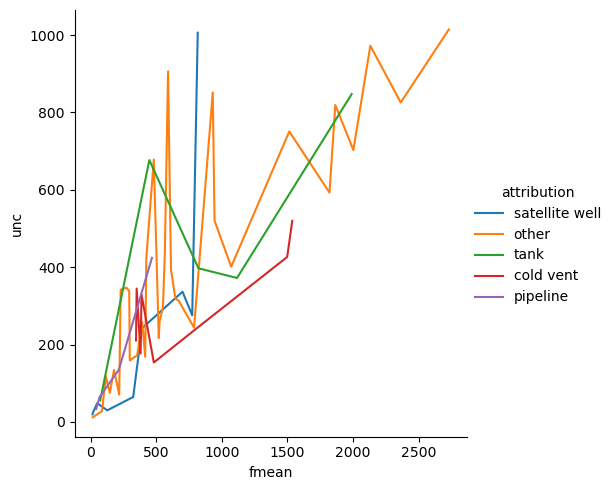

In [8]:
#display(offshore)
#offshore_no = offshore.drop(offshore.loc[offshore['unc']>2000].index, inplace=True)
#wellsNA = wells[wells.ENVOperator != "INACTIVE OPERATOR"]
offshore_no = offshore[offshore.unc <= 2500]

sns.relplot(x="fmean", y="unc", hue="attribution", data=offshore_no, kind="line")
plt.show()
#display(offshore_no)

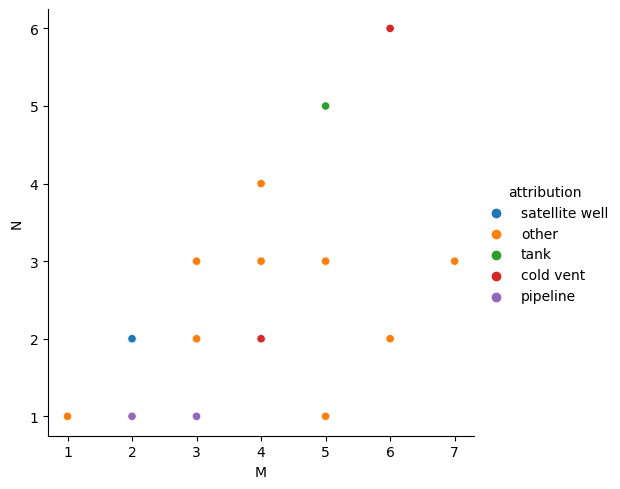

In [9]:
sns.relplot(x="M", y="N", hue="attribution", data=offshore_no)
plt.show()

In [10]:
offshoreNequalsM = offshore.loc[offshore['N'] == offshore['M']]
offshoreNequalsM 

,source_id,Longitude,Latitude,fmean,unc,N,M,f,attribution
0,1,-89.773347,29.374246,125.838,29.822,1,1,1.0,satellite well
1,2,-89.452683,29.574596,2730.753,1014.515,1,1,1.0,other
2,3,-89.388159,29.132778,943.860,520.396,3,3,1.0,other
4,5,-89.286486,29.088608,1864.778,819.160,1,1,1.0,other
5,6,-89.511741,29.570732,1536.646,519.764,6,6,1.0,cold vent
8,9,-90.353019,28.928936,1820.277,592.546,3,3,1.0,other
13,14,-89.403054,29.452555,773.750,275.422,3,3,1.0,satellite well
15,16,-89.769926,29.363074,1497.723,426.216,1,1,1.0,cold vent
23,24,-92.062079,29.441633,2363.450,825.602,2,2,1.0,other
26,27,-90.960397,28.954885,1070.666,401.072,4,4,1.0,other


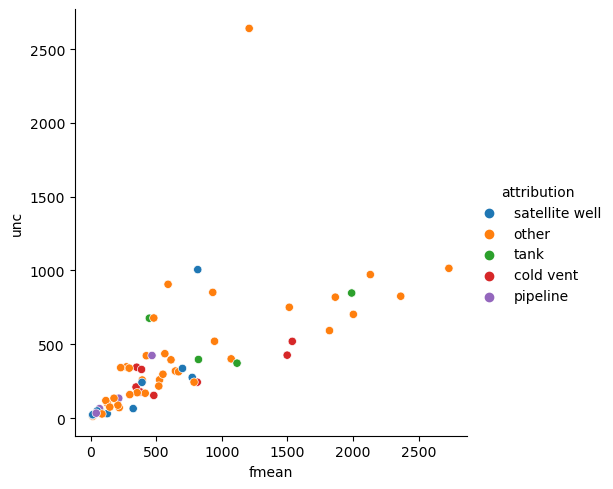

In [11]:
sns.relplot(x="fmean", y="unc", hue="attribution", data=offshore)
plt.show()

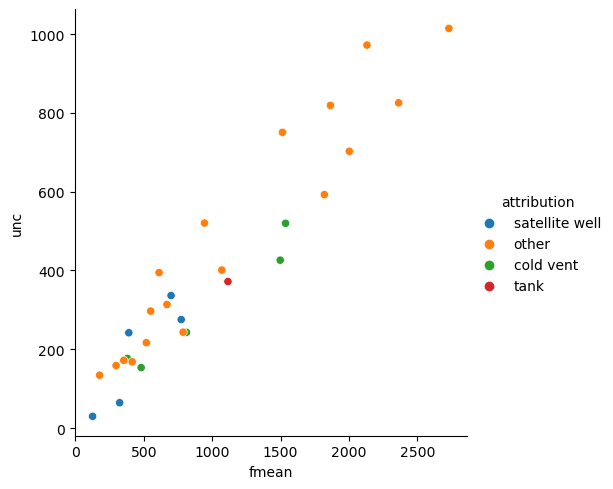

In [12]:
sns.relplot(x="fmean", y="unc", hue="attribution", data=offshoreNequalsM)
plt.show()

In [13]:
sns.histplot(
    offshoreNequalsM,
    x='fmean',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    stat="percent",
    hue="unc",
    multiple='stack',
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
)
#plt.show()

<AxesSubplot:xlabel='fmean', ylabel='Percent'>

In [14]:
sns.histplot(
    offshoreNequalsM,
    x='fmean',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    stat="percent",
    hue="unc",
    multiple='stack',
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
)
#plt.show()

<AxesSubplot:xlabel='fmean', ylabel='Percent'>

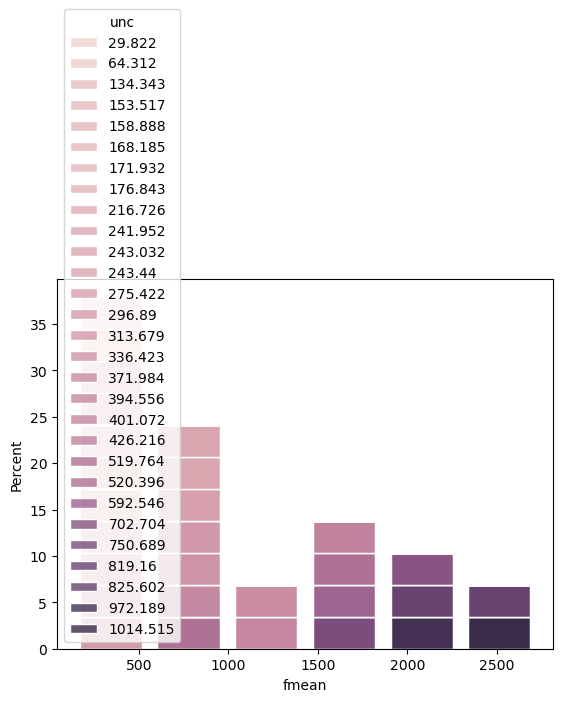

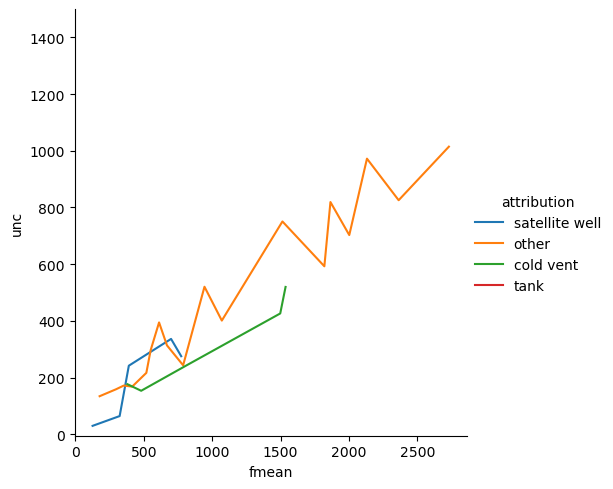

In [15]:
sns.relplot(x="fmean", y="unc", hue="attribution", data=offshoreNequalsM, kind="line").set(ylim=(-5, 1500))
plt.show()

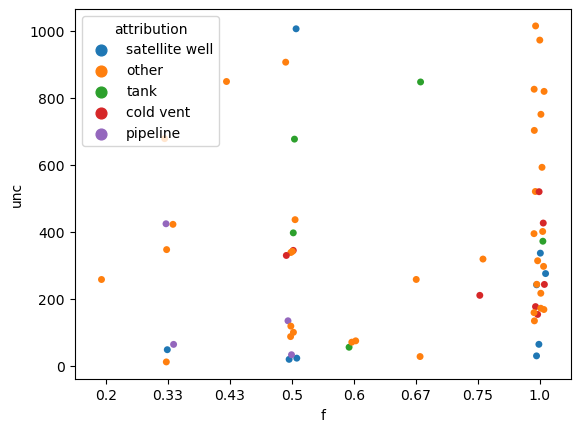

In [16]:
sns.stripplot(x="f", y="unc", hue="attribution", data=offshore_no) #also did for NequalM deleted on accident
plt.show()

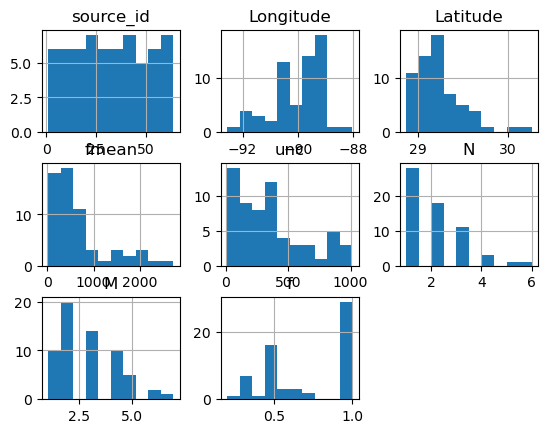

In [17]:
offshore_no.hist()
plt.show()

In [18]:
#display(wells)
#dtype={'Latitude': float}

In [19]:
wells_and_offshore = wells.merge(offshore, on='Longitude')
display(wells_and_offshore)

,Country,ENVOperator,RawOperator,InitialOperator,ENVBasin,Latitude_x,Longitude,Field,SurfaceLatitudeLongitudeSource,source_id,Latitude_y,fmean,unc,N,M,f,attribution
0,US,TEXAS PETROLEUM INVESTMENT COMPANY,TEXAS PETROLEUM INVESTMENT COMPANY,TEXAS PETROLEUM INVESTMENT COMPANY,GOM OFFSHORE,29.579911,-89.098749,BRETON SOUND BLOCK 20,REPORTED,10,29.284820,15.381,11.774,1,3,0.33,other
1,US,TEXAS PETROLEUM INVESTMENT COMPANY,TEXAS PETROLEUM INVESTMENT COMPANY,TEXAS PETROLEUM INVESTMENT COMPANY,GOM OFFSHORE,29.579911,-89.098749,BRETON SOUND BLOCK 20,REPORTED,10,29.284820,15.381,11.774,1,3,0.33,other
2,US,CHEVRON,"TEXACO, INC.",CHEVRON,GOM OFFSHORE,29.168632,-90.667497,BAY ST ELAINE,REPORTED,19,29.186781,271.594,346.954,1,3,0.33,other


In [20]:
#wellsNA = wells.drop(wells.loc[wells['ENVOperator']=="INACTIVE OPERATOR"].index, inplace=True)
#display(wellsNA)
wellsNA = wells[wells.ENVOperator != "INACTIVE OPERATOR"]
#display(wellsNA)

In [ ]:
sns.relplot(x="RawOperator", y="InitialOperator", hue="Field", col="ENVBasin", data=wellsNA)
plt.show()

In [ ]:
#offshore_heat = offshore.pivot_table("fmean", "f", "attribution")
#offshore_heat = offshore.pivot_table("N", "M", "attribution")
offshore_heat1 = offshore.pivot_table("N", "M", "attribution", aggfunc='count')
#No offshore_heat = offshore.pivot_table("unc", "M", "attribution")


#offshore_heat = offshore.pivot_table("Blood lead (ug/dL)", "Race", "Annual Household Income", aggfunc='mean')
#value of table (mean of), y var, x var, agg fxn
sns.heatmap(offshore_heat1, annot=True, cmap="YlGnBu", linewidths=.5)
#sns.heatmap(offshore_heat, annot=True, cmap="YlGnBu", linewidths=.5, vmax=5.0)
#plt.title('Heatmap of Mean Blood Level with Race and Income', fontsize = 20) # title with fontsize 20
#plt.xlabel('Annual Household Income ($)', fontsize = 15) # x-axis label with fontsize 15
#plt.ylabel('Race', fontsize = 15) # y-axis label with fontsize 15

In [ ]:
#offshore3 = offshore.round(3)
#offshore4 = offshore.round(4)
#wells3 = wells.round(3)
#wells4 = wells.round(4)

In [ ]:
#wells_and_offshore3o = wells3.merge(offshore3, on='Longitude')
#display(wells_and_offshore3o)

In [ ]:
#wells_and_offshore4o = wells4.merge(offshore4, on='Longitude')
#display(wells_and_offshore4o)

In [ ]:
#wells_and_offshore3a = wells3.merge(offshore3, on='Latitude')
#display(wells_and_offshore3a)

In [ ]:
#wells_and_offshore4a = wells4.merge(offshore4, on='Latitude')
#display(wells_and_offshore4a)